In [26]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [27]:
sample_text = """I've always been drawn to sports—not just for the thrill of the game, but for everything they represent.
There's something amazing about watching a last-minute goal or a buzzer-beater shot, knowing the sheer effort and heart that went into that moment.
I love how sports bring people together, whether it's friends cheering for their team or strangers bonding over a shared win (or loss).
And it's not just about winning—it's about the hustle, the teamwork, and learning to pick yourself up after a tough loss.
Athletes inspire me with how far they push themselves, physically and mentally.
For me, sports are more than just games—they're stories of passion, resilience, and connection."""

my_text_lower = sample_text.lower()

my_clean_text = re.sub(r'[^\w\s]', '', my_text_lower)

print(my_clean_text)

ive always been drawn to sportsnot just for the thrill of the game but for everything they represent
theres something amazing about watching a lastminute goal or a buzzerbeater shot knowing the sheer effort and heart that went into that moment
i love how sports bring people together whether its friends cheering for their team or strangers bonding over a shared win or loss
and its not just about winningits about the hustle the teamwork and learning to pick yourself up after a tough loss
athletes inspire me with how far they push themselves physically and mentally
for me sports are more than just gamestheyre stories of passion resilience and connection


In [28]:
my_sentences = sent_tokenize(sample_text)
print("Sentences:", my_sentences)

my_words = word_tokenize(my_clean_text)
print("Words:", my_words)

Sentences: ["I've always been drawn to sports—not just for the thrill of the game, but for everything they represent.", "There's something amazing about watching a last-minute goal or a buzzer-beater shot, knowing the sheer effort and heart that went into that moment.", "I love how sports bring people together, whether it's friends cheering for their team or strangers bonding over a shared win (or loss).", "And it's not just about winning—it's about the hustle, the teamwork, and learning to pick yourself up after a tough loss.", 'Athletes inspire me with how far they push themselves, physically and mentally.', "For me, sports are more than just games—they're stories of passion, resilience, and connection."]
Words: ['ive', 'always', 'been', 'drawn', 'to', 'sportsnot', 'just', 'for', 'the', 'thrill', 'of', 'the', 'game', 'but', 'for', 'everything', 'they', 'represent', 'theres', 'something', 'amazing', 'about', 'watching', 'a', 'lastminute', 'goal', 'or', 'a', 'buzzerbeater', 'shot', 'kn

In [29]:
split_text = my_clean_text.split()
print("Split words:", split_text)

tokenized_text = word_tokenize(my_clean_text)
print("Tokenized words:", tokenized_text)

Split words: ['ive', 'always', 'been', 'drawn', 'to', 'sportsnot', 'just', 'for', 'the', 'thrill', 'of', 'the', 'game', 'but', 'for', 'everything', 'they', 'represent', 'theres', 'something', 'amazing', 'about', 'watching', 'a', 'lastminute', 'goal', 'or', 'a', 'buzzerbeater', 'shot', 'knowing', 'the', 'sheer', 'effort', 'and', 'heart', 'that', 'went', 'into', 'that', 'moment', 'i', 'love', 'how', 'sports', 'bring', 'people', 'together', 'whether', 'its', 'friends', 'cheering', 'for', 'their', 'team', 'or', 'strangers', 'bonding', 'over', 'a', 'shared', 'win', 'or', 'loss', 'and', 'its', 'not', 'just', 'about', 'winningits', 'about', 'the', 'hustle', 'the', 'teamwork', 'and', 'learning', 'to', 'pick', 'yourself', 'up', 'after', 'a', 'tough', 'loss', 'athletes', 'inspire', 'me', 'with', 'how', 'far', 'they', 'push', 'themselves', 'physically', 'and', 'mentally', 'for', 'me', 'sports', 'are', 'more', 'than', 'just', 'gamestheyre', 'stories', 'of', 'passion', 'resilience', 'and', 'connect

In [30]:
my_stop_words = set(stopwords.words('english'))

filtered_text = [word for word in tokenized_text if word not in my_stop_words]
print("Filtered Words:", filtered_text)

Filtered Words: ['ive', 'always', 'drawn', 'sportsnot', 'thrill', 'game', 'everything', 'represent', 'theres', 'something', 'amazing', 'watching', 'lastminute', 'goal', 'buzzerbeater', 'shot', 'knowing', 'sheer', 'effort', 'heart', 'went', 'moment', 'love', 'sports', 'bring', 'people', 'together', 'whether', 'friends', 'cheering', 'team', 'strangers', 'bonding', 'shared', 'win', 'loss', 'winningits', 'hustle', 'teamwork', 'learning', 'pick', 'tough', 'loss', 'athletes', 'inspire', 'far', 'push', 'physically', 'mentally', 'sports', 'gamestheyre', 'stories', 'passion', 'resilience', 'connection']


<Axes: title={'center': 'Word Frequency (without Stopwords)'}, xlabel='Samples', ylabel='Counts'>

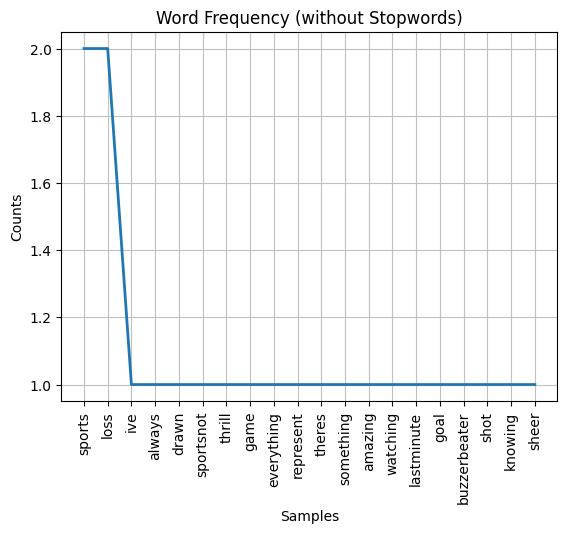

In [31]:
word_freq = FreqDist(filtered_text)

word_freq.plot(20, title="Word Frequency (without Stopwords)")

In [32]:
text_lowercase = sample_text.lower()

letter_only_words = re.findall(r'\b[a-zA-Z]+\b', text_lowercase)
print("Alphabetic Words:", letter_only_words)

Alphabetic Words: ['i', 've', 'always', 'been', 'drawn', 'to', 'sports', 'not', 'just', 'for', 'the', 'thrill', 'of', 'the', 'game', 'but', 'for', 'everything', 'they', 'represent', 'there', 's', 'something', 'amazing', 'about', 'watching', 'a', 'last', 'minute', 'goal', 'or', 'a', 'buzzer', 'beater', 'shot', 'knowing', 'the', 'sheer', 'effort', 'and', 'heart', 'that', 'went', 'into', 'that', 'moment', 'i', 'love', 'how', 'sports', 'bring', 'people', 'together', 'whether', 'it', 's', 'friends', 'cheering', 'for', 'their', 'team', 'or', 'strangers', 'bonding', 'over', 'a', 'shared', 'win', 'or', 'loss', 'and', 'it', 's', 'not', 'just', 'about', 'winning', 'it', 's', 'about', 'the', 'hustle', 'the', 'teamwork', 'and', 'learning', 'to', 'pick', 'yourself', 'up', 'after', 'a', 'tough', 'loss', 'athletes', 'inspire', 'me', 'with', 'how', 'far', 'they', 'push', 'themselves', 'physically', 'and', 'mentally', 'for', 'me', 'sports', 'are', 'more', 'than', 'just', 'games', 'they', 're', 'stories

In [33]:
my_stopwords = set(stopwords.words('english'))

clean_words = [word for word in letter_only_words if word not in my_stopwords]
print("Filtered Words:", clean_words)

Filtered Words: ['always', 'drawn', 'sports', 'thrill', 'game', 'everything', 'represent', 'something', 'amazing', 'watching', 'last', 'minute', 'goal', 'buzzer', 'beater', 'shot', 'knowing', 'sheer', 'effort', 'heart', 'went', 'moment', 'love', 'sports', 'bring', 'people', 'together', 'whether', 'friends', 'cheering', 'team', 'strangers', 'bonding', 'shared', 'win', 'loss', 'winning', 'hustle', 'teamwork', 'learning', 'pick', 'tough', 'loss', 'athletes', 'inspire', 'far', 'push', 'physically', 'mentally', 'sports', 'games', 'stories', 'passion', 'resilience', 'connection']


In [34]:
my_stemmer = PorterStemmer()

stemmed_words = [my_stemmer.stem(word) for word in clean_words]
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['alway', 'drawn', 'sport', 'thrill', 'game', 'everyth', 'repres', 'someth', 'amaz', 'watch', 'last', 'minut', 'goal', 'buzzer', 'beater', 'shot', 'know', 'sheer', 'effort', 'heart', 'went', 'moment', 'love', 'sport', 'bring', 'peopl', 'togeth', 'whether', 'friend', 'cheer', 'team', 'stranger', 'bond', 'share', 'win', 'loss', 'win', 'hustl', 'teamwork', 'learn', 'pick', 'tough', 'loss', 'athlet', 'inspir', 'far', 'push', 'physic', 'mental', 'sport', 'game', 'stori', 'passion', 'resili', 'connect']


In [35]:
my_lemmatizer = WordNetLemmatizer()

lemmatized_words = [my_lemmatizer.lemmatize(word) for word in clean_words]
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['always', 'drawn', 'sport', 'thrill', 'game', 'everything', 'represent', 'something', 'amazing', 'watching', 'last', 'minute', 'goal', 'buzzer', 'beater', 'shot', 'knowing', 'sheer', 'effort', 'heart', 'went', 'moment', 'love', 'sport', 'bring', 'people', 'together', 'whether', 'friend', 'cheering', 'team', 'stranger', 'bonding', 'shared', 'win', 'loss', 'winning', 'hustle', 'teamwork', 'learning', 'pick', 'tough', 'loss', 'athlete', 'inspire', 'far', 'push', 'physically', 'mentally', 'sport', 'game', 'story', 'passion', 'resilience', 'connection']


In [36]:
my_examples = [
    "Breakthrough in Battery Tech Promises EVs with 1,000km Range by 2026",
    "Crisp sound, strong bass, and they actually stay in my ears while running—these earbuds are a game-changer for workouts!",
    "Sunsets hit different when you're on a mountain top. Grateful for views like this #Wanderlust #NatureFix"
]

In [37]:
bow_vectorizer = CountVectorizer()

bow_matrix = bow_vectorizer.fit_transform(my_examples)

print("Vocabulary:", bow_vectorizer.get_feature_names_out())

print("Bag of Words Matrix:\n", bow_matrix.toarray())

Vocabulary: ['000km' '2026' 'actually' 'and' 'are' 'bass' 'battery' 'breakthrough'
 'by' 'changer' 'crisp' 'different' 'earbuds' 'ears' 'evs' 'for' 'game'
 'grateful' 'hit' 'in' 'like' 'mountain' 'my' 'naturefix' 'on' 'promises'
 'range' 're' 'running' 'sound' 'stay' 'strong' 'sunsets' 'tech' 'these'
 'they' 'this' 'top' 'views' 'wanderlust' 'when' 'while' 'with' 'workouts'
 'you']
Bag of Words Matrix:
 [[1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1
  0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0
  1 1 1 1 1 0 0 0 1]]


In [38]:
my_tfidf = TfidfVectorizer()

tfidf_matrix = my_tfidf.fit_transform(my_examples)

feature_list = my_tfidf.get_feature_names_out()

print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

TF-IDF Matrix:
 [[0.30746099 0.30746099 0.         0.         0.         0.
  0.30746099 0.30746099 0.30746099 0.         0.         0.
  0.         0.         0.30746099 0.         0.         0.
  0.         0.23383201 0.         0.         0.         0.
  0.         0.30746099 0.30746099 0.         0.         0.
  0.         0.         0.         0.30746099 0.         0.
  0.         0.         0.         0.         0.         0.
  0.30746099 0.         0.        ]
 [0.         0.         0.22847492 0.22847492 0.22847492 0.22847492
  0.         0.         0.         0.22847492 0.22847492 0.
  0.22847492 0.22847492 0.         0.17376106 0.22847492 0.
  0.         0.17376106 0.         0.         0.22847492 0.
  0.         0.         0.         0.         0.22847492 0.22847492
  0.22847492 0.22847492 0.         0.         0.22847492 0.22847492
  0.         0.         0.         0.         0.         0.22847492
  0.         0.22847492 0.        ]
 [0.         0.         0.         0.   

In [39]:
for i in range(len(my_examples)):
    print(f"\nText {i+1}: {my_examples[i]}")

    row_data = tfidf_matrix[i].toarray()[0]

    top_idx = row_data.argsort()[-3:][::-1]

    for idx in top_idx:
        print(f"   {feature_list[idx]} (Score: {row_data[idx]:.3f})")


Text 1: Breakthrough in Battery Tech Promises EVs with 1,000km Range by 2026
   with (Score: 0.307)
   tech (Score: 0.307)
   2026 (Score: 0.307)

Text 2: Crisp sound, strong bass, and they actually stay in my ears while running—these earbuds are a game-changer for workouts!
   workouts (Score: 0.228)
   while (Score: 0.228)
   these (Score: 0.228)

Text 3: Sunsets hit different when you're on a mountain top. Grateful for views like this #Wanderlust #NatureFix
   you (Score: 0.253)
   when (Score: 0.253)
   top (Score: 0.253)


In [40]:
sample1 = """Artificial Intelligence is a field of computer science that focuses on creating machines capable of mimicking human intelligence. It includes areas like machine learning, natural language processing, and robotics. AI systems are designed to solve problems, make decisions, and learn from experience."""

sample2 = """Blockchain is a decentralized and secure technology that stores data in blocks connected in a chain. It enables transparent, tamper-proof transactions without the need for intermediaries. Blockchain powers cryptocurrencies like Bitcoin and supports smart contracts."""

def process_text(input_text):
    input_text = input_text.lower()
    input_text = re.sub(r'[^\w\s]', '', input_text)
    tokens = word_tokenize(input_text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

tokens_sample1 = process_text(sample1)
tokens_sample2 = process_text(sample2)

print("Tokens 1:", tokens_sample1)
print("Tokens 2:", tokens_sample2)

Tokens 1: ['artificial', 'intelligence', 'field', 'computer', 'science', 'focuses', 'creating', 'machines', 'capable', 'mimicking', 'human', 'intelligence', 'includes', 'areas', 'like', 'machine', 'learning', 'natural', 'language', 'processing', 'robotics', 'ai', 'systems', 'designed', 'solve', 'problems', 'make', 'decisions', 'learn', 'experience']
Tokens 2: ['blockchain', 'decentralized', 'secure', 'technology', 'stores', 'data', 'blocks', 'connected', 'chain', 'enables', 'transparent', 'tamperproof', 'transactions', 'without', 'need', 'intermediaries', 'blockchain', 'powers', 'cryptocurrencies', 'like', 'bitcoin', 'supports', 'smart', 'contracts']


In [41]:
set_sample1 = set(tokens_sample1)
set_sample2 = set(tokens_sample2)

jaccard_similarity = len(set_sample1 & set_sample2) / len(set_sample1 | set_sample2)
print("Jaccard Similarity:", round(jaccard_similarity, 3))

Jaccard Similarity: 0.02


In [42]:
doc_corpus = [sample1, sample2]
text_vectorizer = TfidfVectorizer(stop_words='english')
doc_tfidf = text_vectorizer.fit_transform(doc_corpus)

cos_sim = cosine_similarity(doc_tfidf[0:1], doc_tfidf[1:2])
print("Cosine Similarity:", round(cos_sim[0][0], 3))

Cosine Similarity: 0.018


In [43]:
product_review = """I recently tried out the Ember Temperature Control Smart Mug, and it's honestly a small luxury that makes a big difference.
            I love how it keeps my coffee at the perfect temperature for hours—no more rushing to drink it before it gets cold.
            The app integration is simple and works smoothly, letting me set my ideal heat level.
            It's a bit pricey, but if you're someone who sips slowly or gets distracted during the day, it's totally worth it.
            Overall, it feels like a thoughtful upgrade to a daily routine."""

review_sentiment = TextBlob(product_review)
pol_score = review_sentiment.sentiment.polarity
subj_score = review_sentiment.sentiment.subjectivity

print(f"Polarity: {pol_score}")
print(f"Subjectivity: {subj_score}")

Polarity: 0.1915178571428571
Subjectivity: 0.459375


In [44]:
if pol_score > 0:
    review_type = "Positive"
elif pol_score < 0:
    review_type = "Negative"
else:
    review_type = "Neutral"

print("Sentiment:", review_type)

Sentiment: Positive


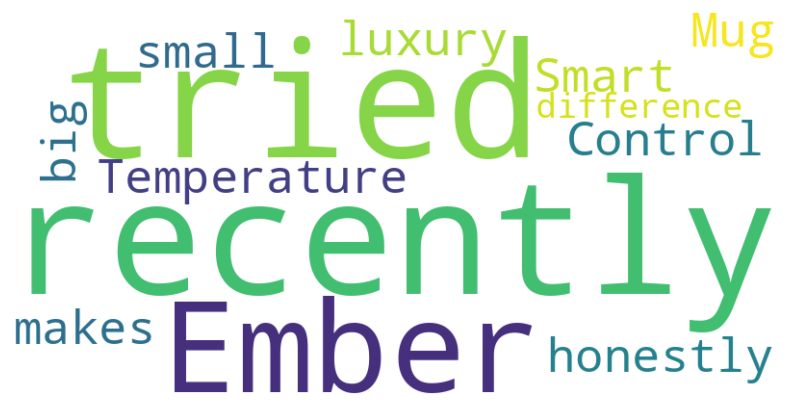

In [45]:
pos_review = """I recently tried out the Ember Temperature Control Smart Mug, and it's honestly a small luxury that makes a big difference."""

my_cloud = WordCloud(width=800, height=400, background_color='white').generate(pos_review)

plt.figure(figsize=(10, 5))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
training_data = """Artificial intelligence is transforming the world.
It is helping industries automate tasks and make smarter decisions.
Machine learning, a subset of AI, enables computers to learn from data.
Natural language processing allows machines to understand human languages.
The future with AI promises efficiency and innovation across all sectors."""

In [47]:
my_tokenizer = Tokenizer()
my_tokenizer.fit_on_texts([training_data])

sequence_list = []
total_word_count = len(my_tokenizer.word_index) + 1

for line in training_data.split('.'):
    token_seq = my_tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_seq)):
        n_gram_seq = token_seq[:i+1]
        sequence_list.append(n_gram_seq)

max_len = max([len(seq) for seq in sequence_list])
padded_seqs = pad_sequences(sequence_list, maxlen=max_len, padding='pre')

X_train = padded_seqs[:, :-1]
y_train = padded_seqs[:, -1]
y_train = np.array(y_train)

In [48]:
my_model = Sequential()
my_model.add(Embedding(total_word_count, 10, input_length=max_len-1))
my_model.add(LSTM(100))
my_model.add(Dense(total_word_count, activation='softmax'))

my_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [49]:
my_model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0000e+00 - loss: 3.7853
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0569 - loss: 3.7822 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0778 - loss: 3.7798
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0569 - loss: 3.7773
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0569 - loss: 3.7750
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0673 - loss: 3.7712
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0778 - loss: 3.7667
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0414 - loss: 3.7611
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0518 - loss: 3.7536
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0518 - loss: 3.7450 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0518 - loss: 3.7336
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.041

In [50]:
seed_phrase = "Artificial intelligence"
gen_words = 5

for _ in range(gen_words):
    input_seq = my_tokenizer.texts_to_sequences([seed_phrase])[0]
    input_seq = pad_sequences([input_seq], maxlen=max_len-1, padding='pre')
    predicted = my_model.predict(input_seq, verbose=0)
    pred_index = np.argmax(predicted)

    output_word = ''
    for word, index in my_tokenizer.word_index.items():
        if index == pred_index:
            output_word = word
            break
    seed_phrase += " " + output_word

print(seed_phrase)

Artificial intelligence is transforming the world world
